**Dataset Link- https://universe.roboflow.com/umitlearning/weather-mjmmd/dataset/1#**

In [1]:
!nvidia-smi

Thu Oct 30 04:55:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.3 MB/s eta 0:00:00


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.6/112.6 GB disk)


### **Load the Dataset**

In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nJBC3Kr2Z6qyZZJgYERo")
project = rf.workspace("davin-lvxhg").project("jenis-burung-kicau-zloca")
version = project.version(2)
dataset = version.download("folder")


loading Roboflow workspace...
loading Roboflow project...


### **Train the model**

In [36]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-cls.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="/content/Jenis-Burung-Kicau-2", epochs=100, imgsz=64)

Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Jenis-Burung-Kicau-2, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=64, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

### **Validate the model**

In [37]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolo11n-cls.pt")  # load an official model
model = YOLO("/content/runs/classify/train2/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1  # top1 accuracy
metrics.top5  # top5 accuracy

Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 47 layers, 1,529,867 parameters, 0 gradients, 3.2 GFLOPs
train: /content/Jenis-Burung-Kicau-2/train... found 112 images in 3 classes ✅ 
val: /content/Jenis-Burung-Kicau-2/valid... found 31 images in 3 classes ✅ 
test: /content/Jenis-Burung-Kicau-2/test... found 16 images in 3 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 630.5±572.7 MB/s, size: 58.1 KB)
val: Scanning /content/Jenis-Burung-Kicau-2/valid... 31 images, 0 corrupt: 100% ━━━━━━━━━━━━ 31/31 68.3Kit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 2/2 5.5it/s 0.4s
                   all      0.968          1
Speed: 0.1ms preprocess, 6.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/runs/classify/val2


1.0

### **See variours images**

In [38]:
from IPython.display import Image

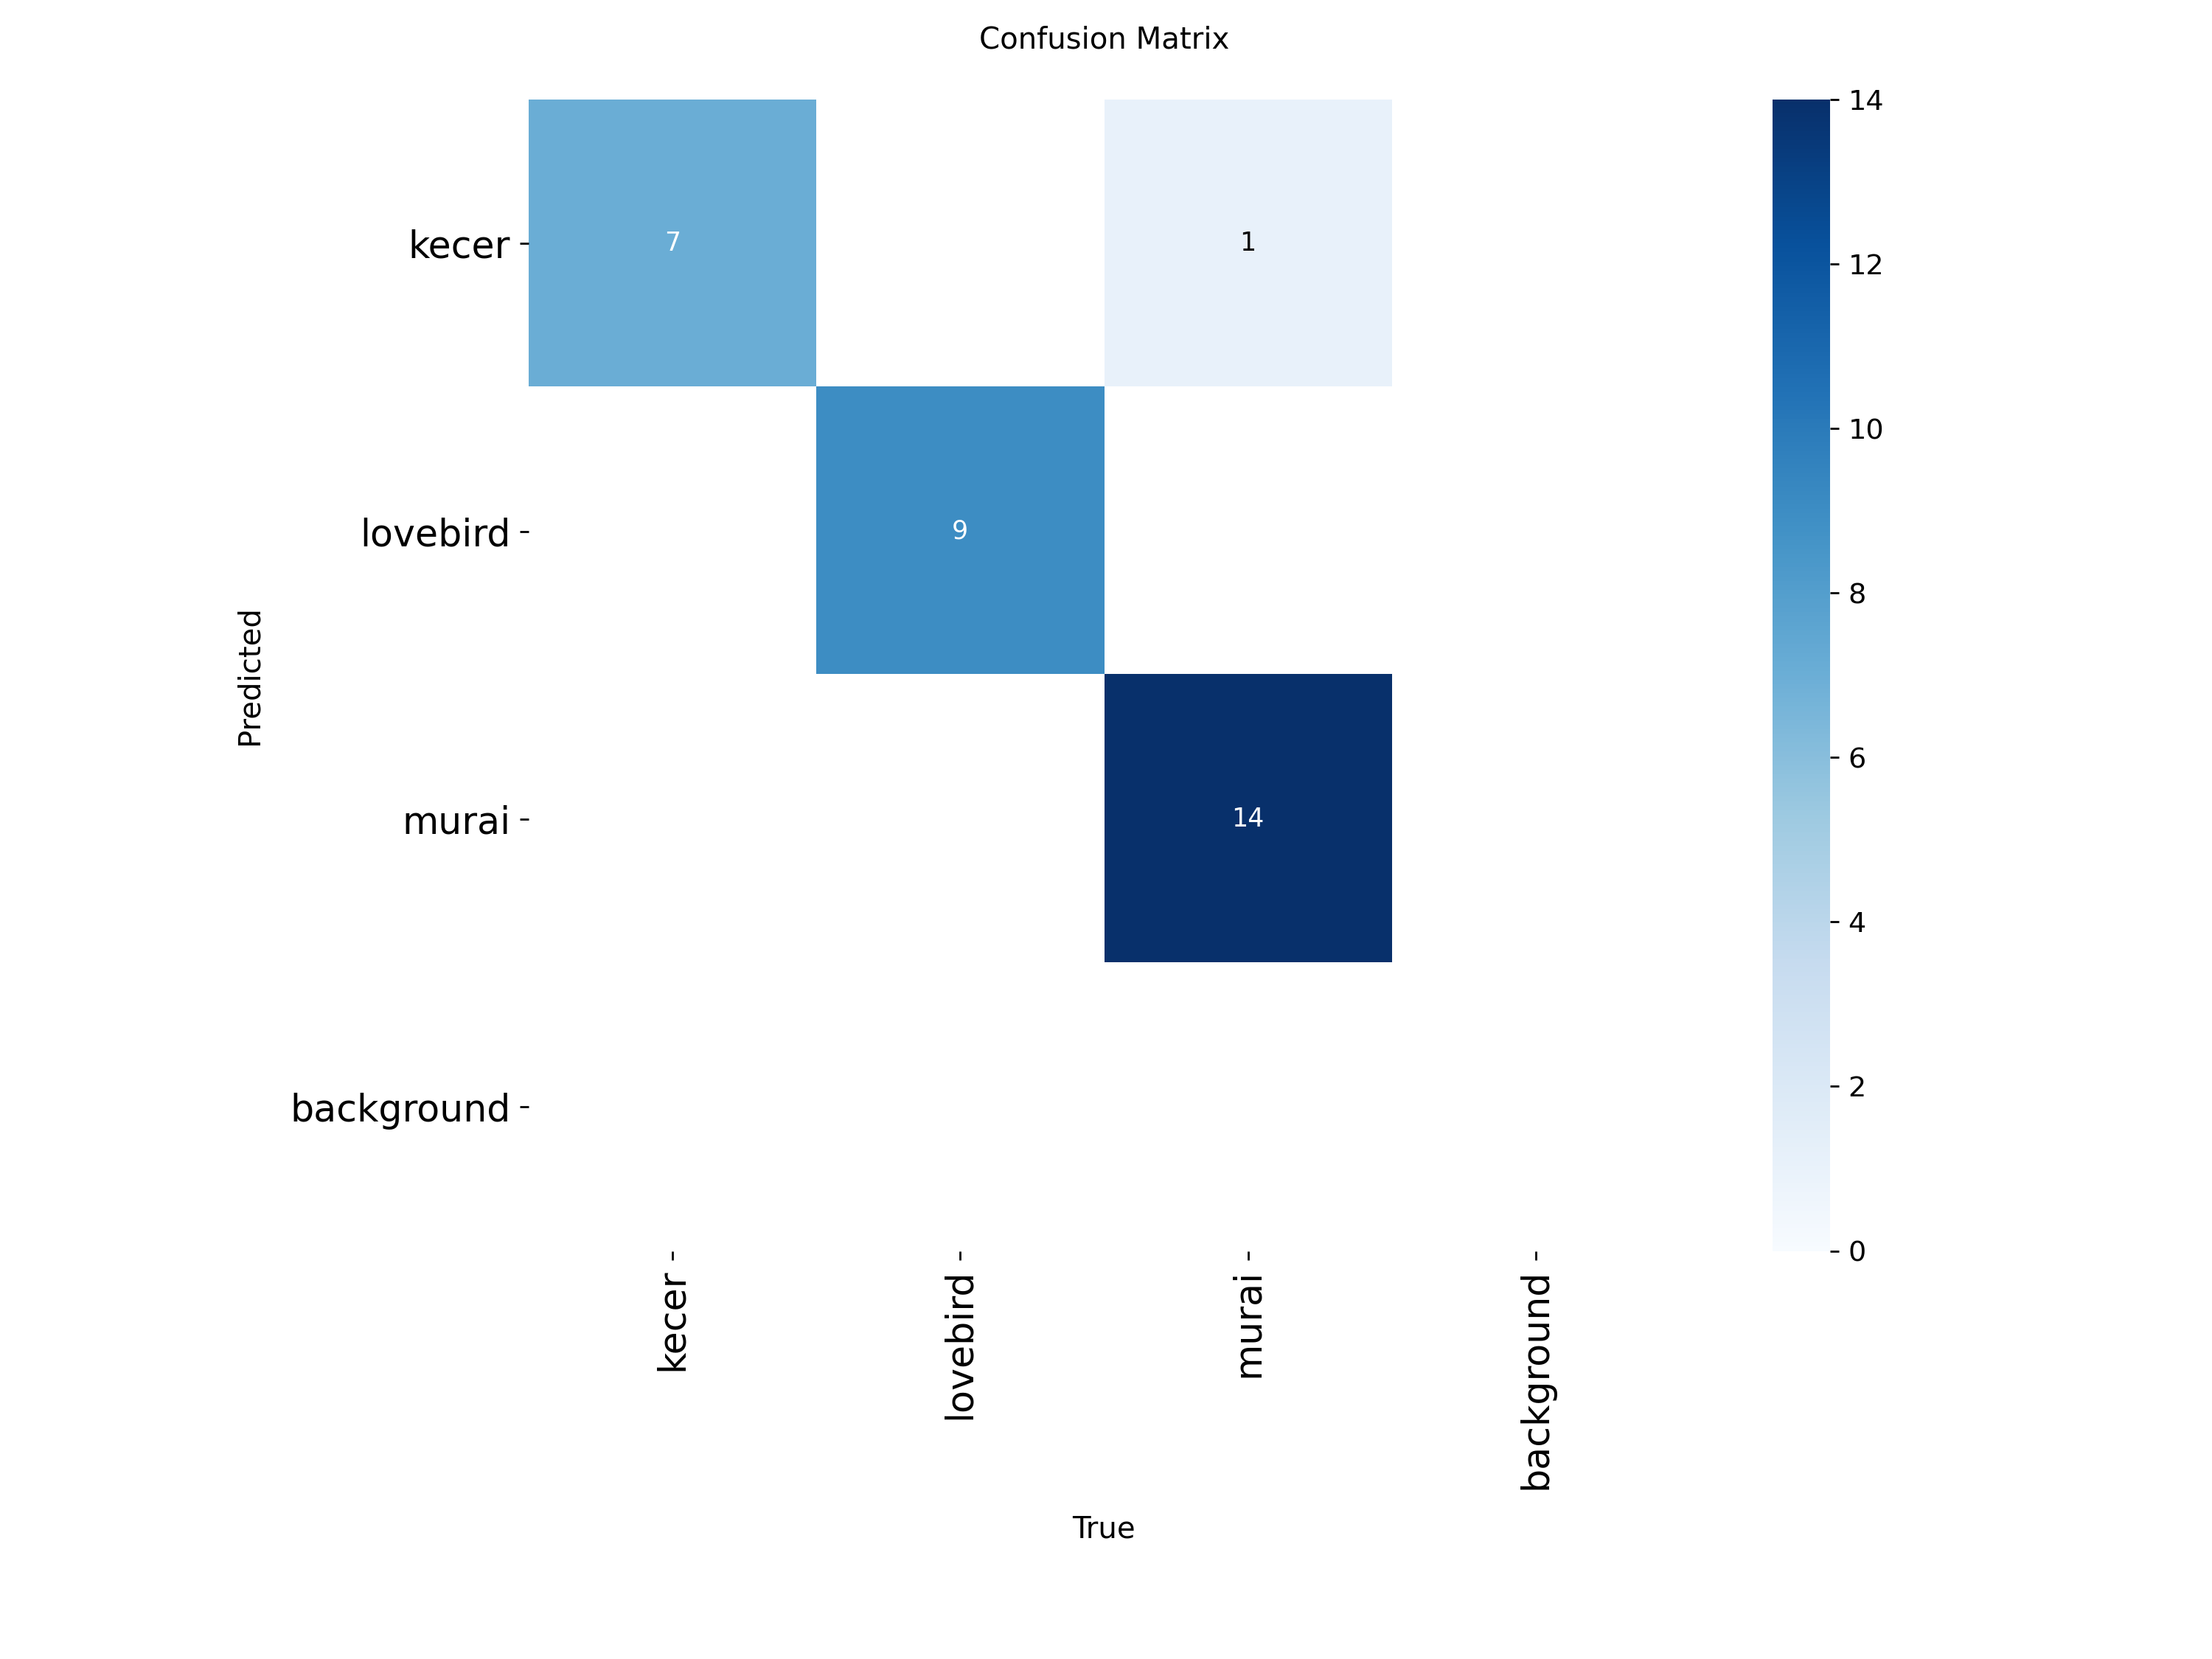

In [40]:
Image("/content/runs/classify/train2/confusion_matrix.png", width=800)

### **Predict images**

In [43]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/runs/classify/train2/weights/best.pt")  # load a custom model

# Predict with the model
results = model("/content/Jenis-Burung-Kicau-2/test/kecer")  # predict on an image


image 1/4 /content/Jenis-Burung-Kicau-2/test/kecer/download-12-_jpeg.rf.7b50ed65cbf9648c025dae98acb1f88b.jpg: 64x64 kecer 1.00, lovebird 0.00, murai 0.00, 6.5ms
image 2/4 /content/Jenis-Burung-Kicau-2/test/kecer/download-13-_jpeg.rf.397e2b384eb3a82557a39246db943be3.jpg: 64x64 kecer 1.00, murai 0.00, lovebird 0.00, 7.6ms
image 3/4 /content/Jenis-Burung-Kicau-2/test/kecer/download-8-_jpeg.rf.77a89728b2bc81aab6411762a3a6445d.jpg: 64x64 kecer 1.00, murai 0.00, lovebird 0.00, 7.4ms
image 4/4 /content/Jenis-Burung-Kicau-2/test/kecer/images-15-_jpeg.rf.6f4618154e56b634c50de0d3cfe2cbf5.jpg: 64x64 kecer 1.00, lovebird 0.00, murai 0.00, 7.8ms
Speed: 5.1ms preprocess, 7.3ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


### **Show the prediction**

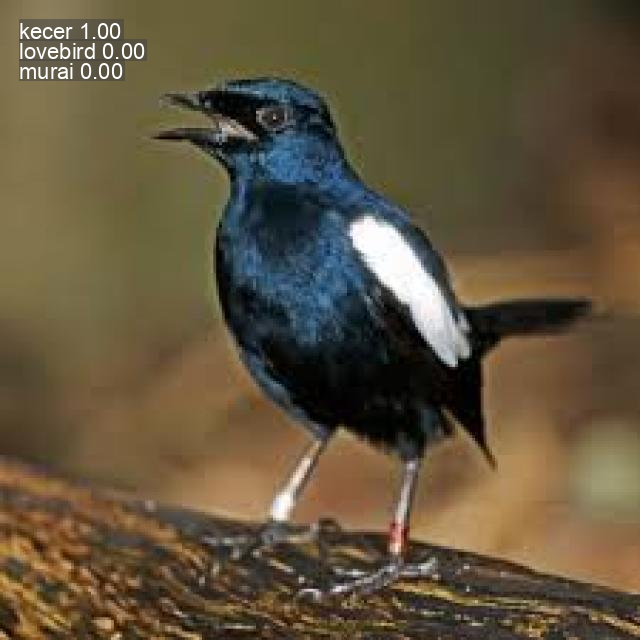

In [44]:
results[3].show()


image 1/1 /content/classify2.jpeg: 64x64 lovebird 0.52, kecer 0.41, murai 0.06, 4.4ms
Speed: 3.6ms preprocess, 4.4ms inference, 0.0ms postprocess per image at shape (1, 3, 64, 64)


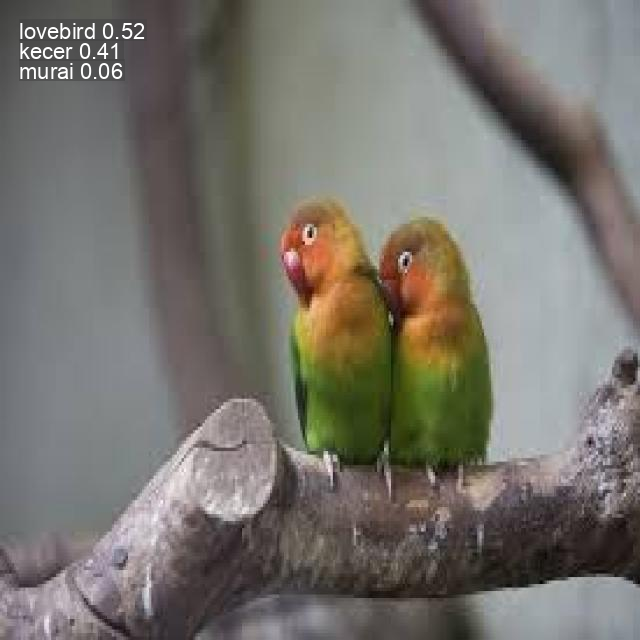

In [45]:
# Predict with the model
result = model("/content/classify2.jpeg")  # predict on an image
result[0].show()